<a href="https://colab.research.google.com/github/nuraimandanial/notebooks/blob/main/Lab%20Work%202%20-%20Wine%20Classification%20using%20Neural%20Network%20(Latest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Work 2 - Wine Prediction in Neural Network

## Library & Dataset Import
Import all needed Library from Python

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

from sklearn.model_selection import (train_test_split)
from sklearn.preprocessing import (StandardScaler)
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

import tensorflow as tf
from tensorflow import keras
from keras import (
    layers,
    optimizers,
    utils
)

In [134]:
from google.colab import drive
drive.mount('/content/drive')
!pwd

path = '/content/drive/MyDrive/Colab Notebooks/LAB WORK 2/Model/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [3]:
csv = [
    ['/content/drive/MyDrive/Colab Notebooks/LAB WORK 2/winequality-red.csv', 'Red Wine'],
    ['/content/drive/MyDrive/Colab Notebooks/LAB WORK 2/winequality-white.csv', 'White Wine']
]

## Data Preparation
Preprocess the wine datasets for any null value, merge and get the datasets description.

### Red and White Wine Dataset Preprocessing

In [4]:
whiteData = pd.read_csv(csv[0][0], delimiter=';')
redData = pd.read_csv(csv[1][0], delimiter=';')

In [5]:
whiteData.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
whiteData.info()
print(whiteData.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides             

In [7]:
redData.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [8]:
redData.info()
print(redData.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides             

### Histogram Plotting for Distribution of Alcohol & Datasets Pairplot

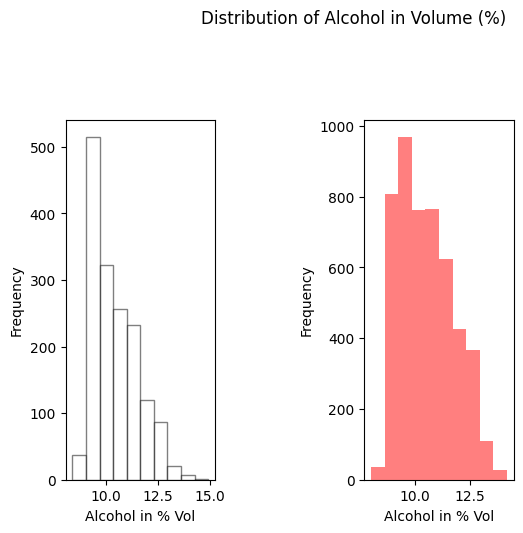

In [9]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(whiteData.alcohol, 10, facecolor='white', ec='black', alpha=0.5, label='White Wine')
ax[1].hist(redData.alcohol, 10, facecolor='red', alpha=0.5, label='Red Wine')

fig.subplots_adjust(left=0.05, right=0.75, bottom=0, top=0.75, hspace=0.05, wspace=1)
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
fig.suptitle('Distribution of Alcohol in Volume (%)')

plt.show()

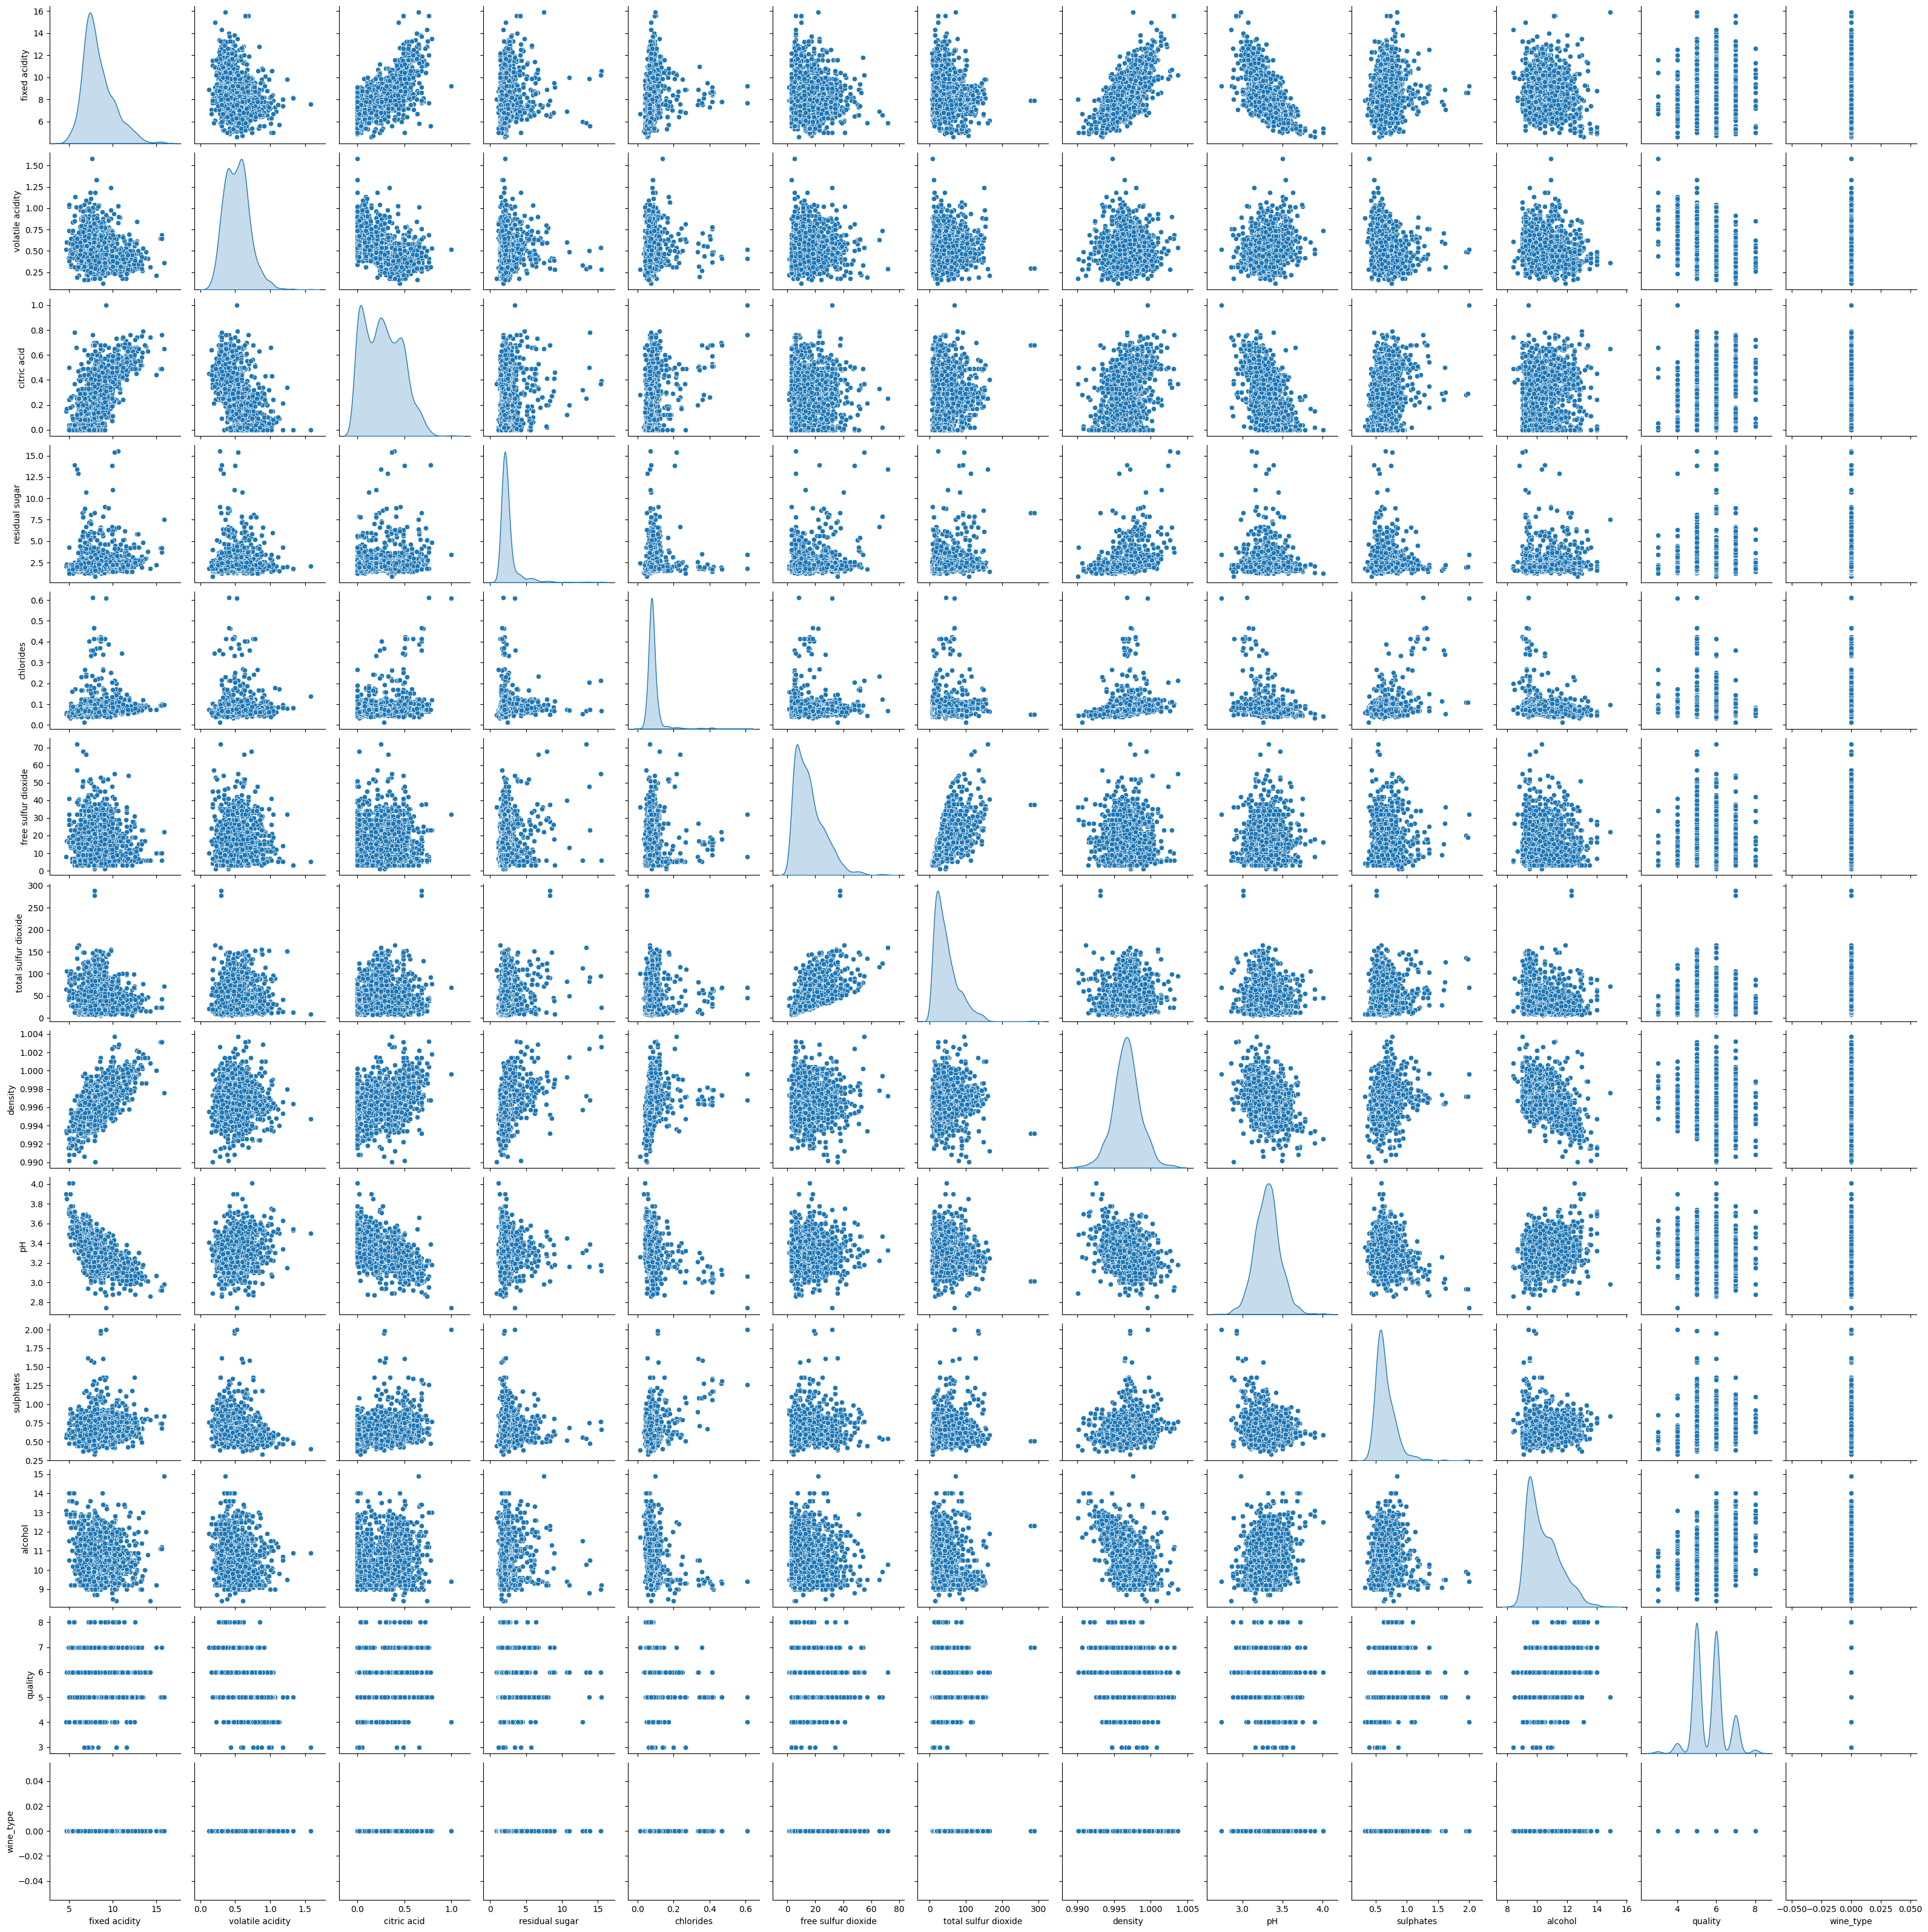

In [149]:
sns.pairplot(data=whiteData, diag_kind='kde')

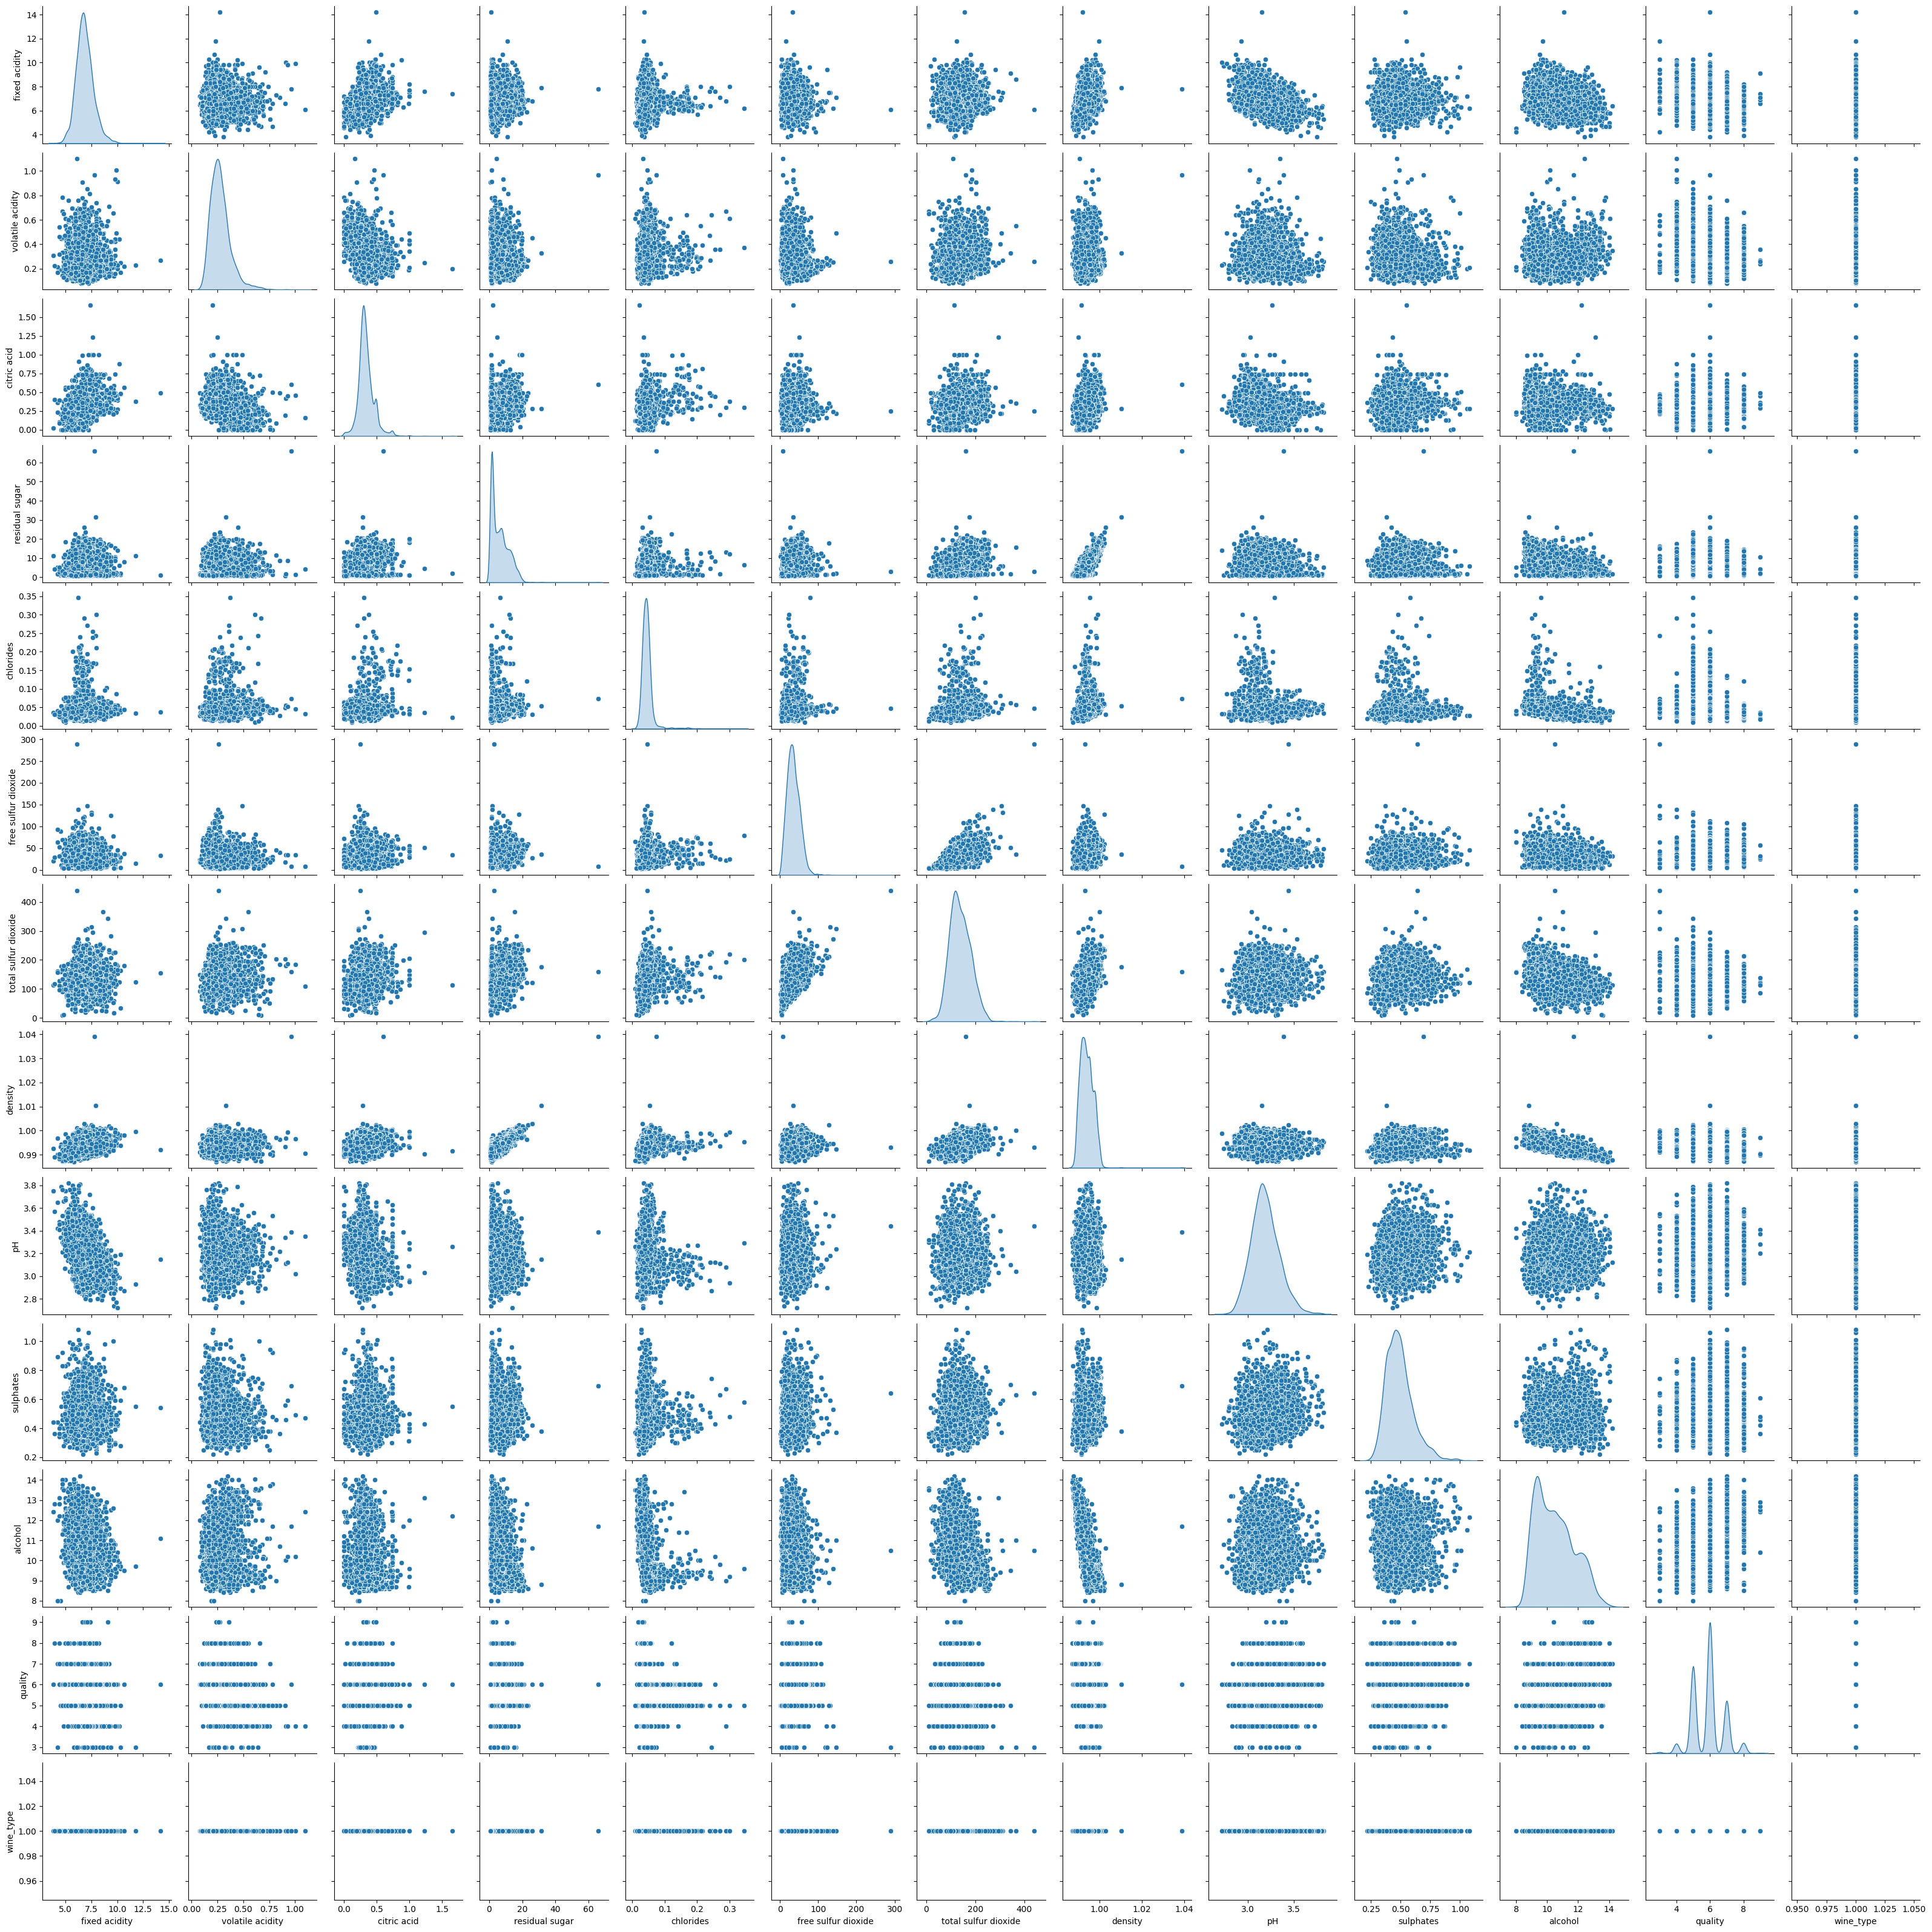

In [150]:
sns.pairplot(data=redData, diag_kind='kde')

### Datasets Merging & Preprocessing

In [11]:
whiteData['wine_type'] = 0
redData['wine_type'] = 1

mergeData = pd.concat([whiteData, redData], ignore_index=True)

In [12]:
mergeData.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  wine_type  
0      9.4        5          0  
1      9.8        5          0  
2      9.8        5          0  
3      9.8        6          0  
4      9.4        5          0

In [13]:
mergeData.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality    wine_type  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.753886  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     1.000000  
50%       3.210000     0.510000    10.300000     6.000000     1.000000  
75%       3.320000     0.600000    11.300000     6.000000     1.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

## Model Development

In [14]:
X = mergeData.drop('wine_type', axis=1)
y = mergeData['wine_type']

X_train, X_validation_test, y_train, y_validation_test = train_test_split(X, y, test_size=0.3)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5)

print('Training Set Shape : ', X_train.shape)
print('Validation Set Shape : ', X_validation.shape)
print('Testing Set Shape : ', X_test.shape)

Training Set Shape :  (4547, 12)
Validation Set Shape :  (975, 12)
Testing Set Shape :  (975, 12)


In [15]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_validation = scaler.transform(X_validation)

### Neural Network Architecture

In [131]:
class modelChooser:
  def constructor(self, number):
    modelConst =  getattr(self, 'model_' + str(number))
    return modelConst()

  def getName(self, number):  
    name = [
      '',
      'Feedforward Neural Network',
      'Convolutional Neural Network',
      'Recurrent Neural Network',
      'Long Short-Term Memory Network',
      'Hybrid (CNN + RNN + FNN) Neural Network'
    ]
    return name[number]
  
  @staticmethod
  def model_1(): #Feedforward Neural Network
    return keras.Sequential([
      layers.Dense(128, activation='relu', input_shape=(X_train.copy().shape[1],)),
      layers.Dense(64, activation='relu'),
      layers.Dense(1, activation='linear')
    ])

  @staticmethod
  def model_2(): #Convolutional Neural Network
    return keras.Sequential([
      layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.copy().shape[1], 1)),
      layers.MaxPooling1D(pool_size=2),
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(1, activation='linear')
    ])

  @staticmethod
  def model_3(): #Recurrent Neural Network
    return keras.Sequential([
      layers.SimpleRNN(64, activation='relu', input_shape=(X_train.copy().shape[1], 1)),
      layers.Dense(1, activation='linear')
    ])

  @staticmethod
  def model_4(): #Long Short-Term Memory Network
    return keras.Sequential([
      layers.LSTM(256, activation='relu', return_sequences=True, input_shape=(X_train.copy().shape[1], 1)),
      layers.LSTM(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(1, activation='linear')
    ])

  @staticmethod
  def model_5(): #Hybrid (CNN + RNN + FNN) Neural Network
    return keras.Sequential([
      layers.Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.copy().shape[1], 1)),
      layers.BatchNormalization(),
      layers.MaxPooling1D(pool_size=2),
      layers.BatchNormalization(),
      layers.SimpleRNN(128),
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.BatchNormalization(),
      layers.Dense(1, activation='sigmoid')
    ])


--------------------------------------------------------------------------------------------------------------------
Model Number : 1. Feedforward Neural Network


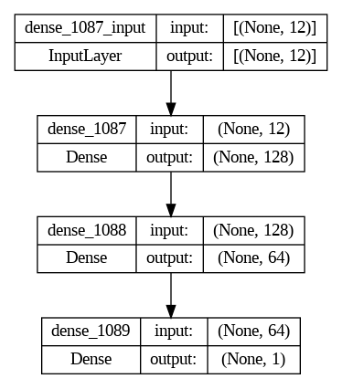

- Test Accuracy : 0.995
- Train Accuracy : 0.997
- Validation Accuracy : 0.997


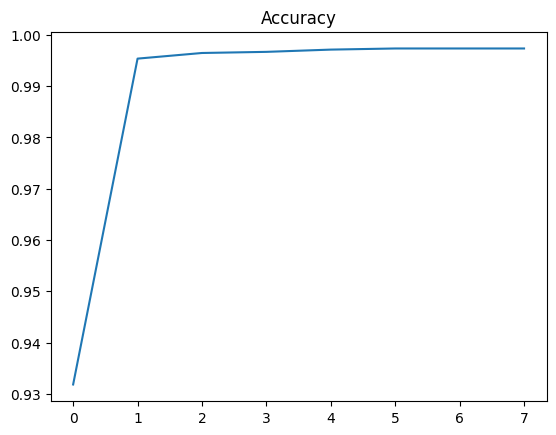

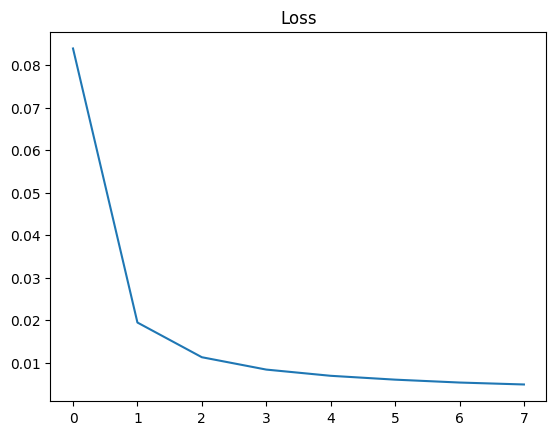

--------------------------------------------------------------------------------------------------------------------
Model Number : 2. Convolutional Neural Network


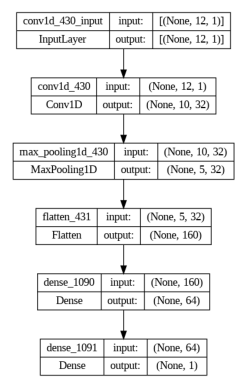

- Test Accuracy : 0.994
- Train Accuracy : 0.997
- Validation Accuracy : 0.995


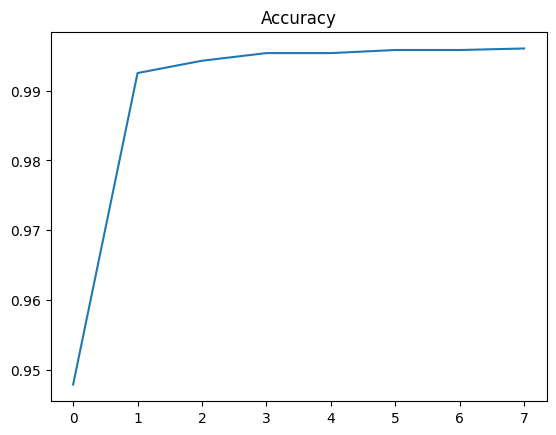

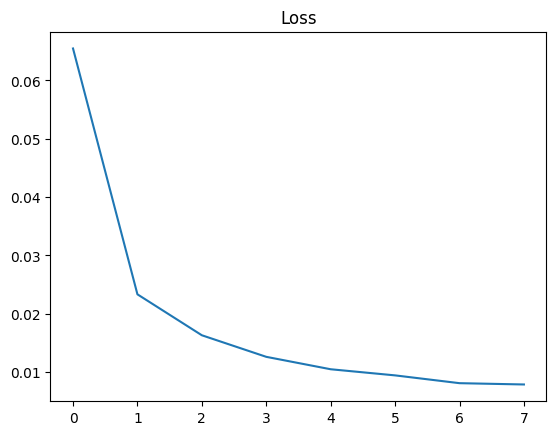

--------------------------------------------------------------------------------------------------------------------
Model Number : 3. Recurrent Neural Network


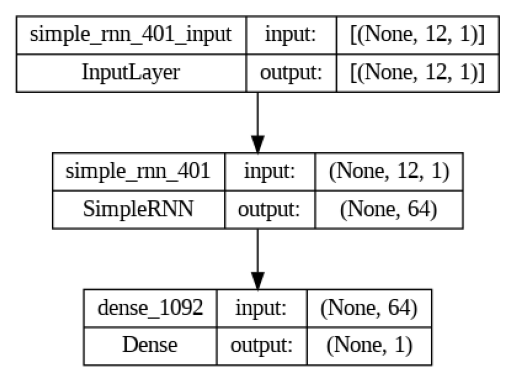

- Test Accuracy : 0.993
- Train Accuracy : 0.997
- Validation Accuracy : 0.995


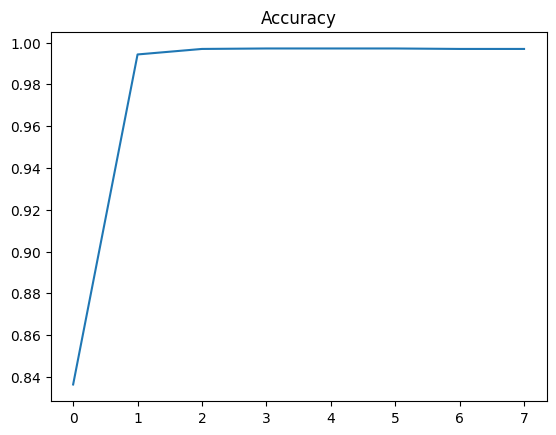

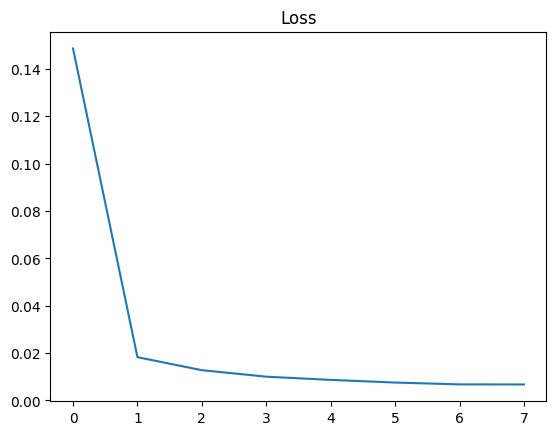

--------------------------------------------------------------------------------------------------------------------
Model Number : 4. Long Short-Term Memory Network


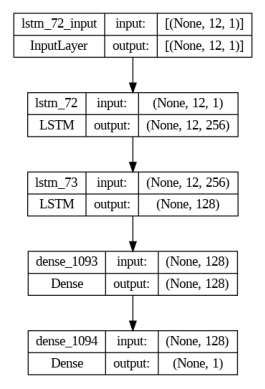

- Test Accuracy : 0.974
- Train Accuracy : 0.975
- Validation Accuracy : 0.975


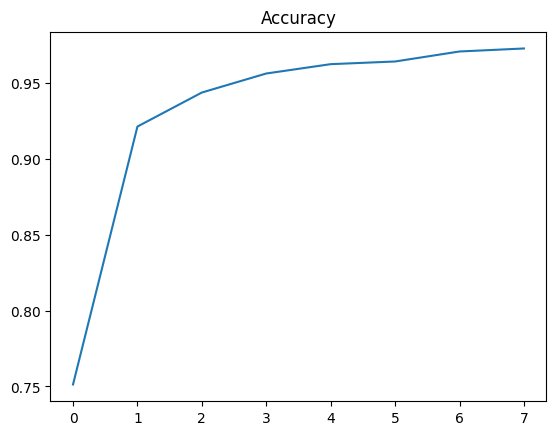

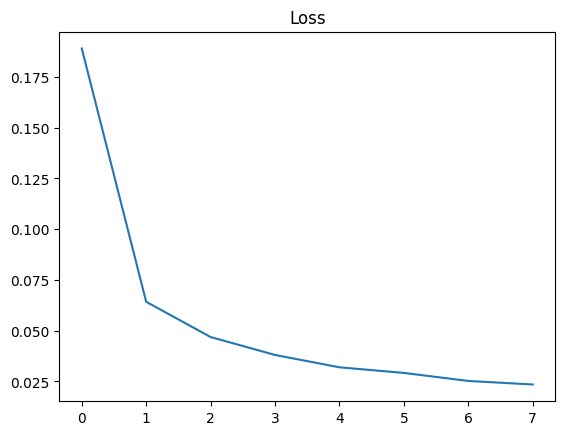

--------------------------------------------------------------------------------------------------------------------
Model Number : 5. Hybrid (CNN + RNN + FNN) Neural Network


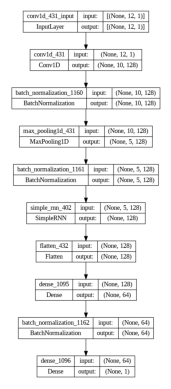

- Test Accuracy : 0.995
- Train Accuracy : 0.998
- Validation Accuracy : 0.995


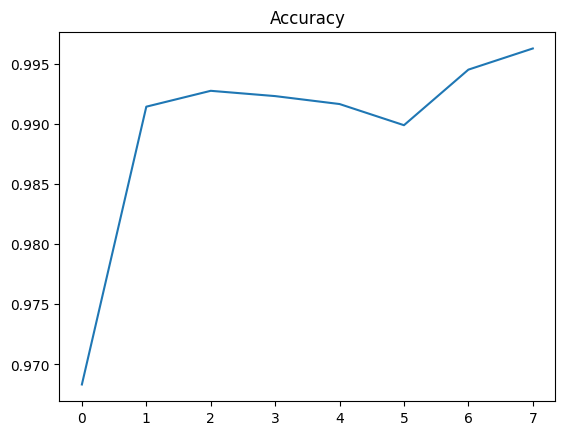

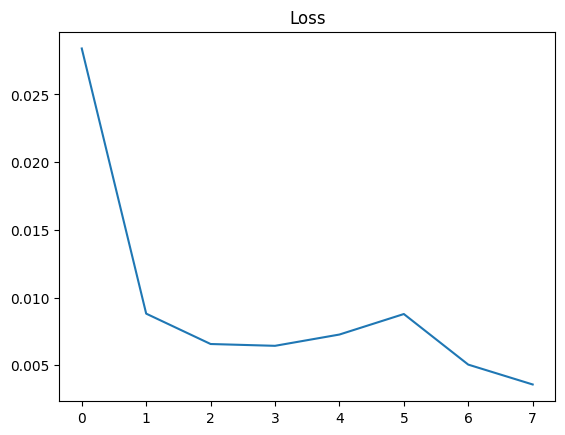

--------------------------------------------------------------------------------------------------------------------


In [135]:
%matplotlib inline

print('--------------------------------------------------------------------------------------------------------------------')
for i in range(1, 6):
  X_tr = copy.deepcopy(X_train)
  X_val = copy.deepcopy(X_validation)
  X_ts = copy.deepcopy(X_test)
  if i == 4 or i == 5:
    X_tr = X_train.copy().reshape(X_train.shape[0], X_train.shape[1], 1),
    X_val = X_validation.copy().reshape(X_validation.shape[0], X_validation.shape[1], 1),
    X_ts = X_test.copy().reshape(X_test.shape[0], X_test.shape[1], 1)

  y_tr = copy.deepcopy(y_train)
  y_val = copy.deepcopy(y_validation)
  y_ts = copy.deepcopy(y_test)

  model = modelChooser().constructor(i)
  name = modelChooser().getName(i)
  print('Model Number : ' + str(i) + '. ' + name)

  model.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['accuracy'])
  history = model.fit(X_tr, y_tr, epochs=8, verbose=0, validation_data=(X_val, y_val))
  
  utils.plot_model(model, to_file=path + 'model-{}.png'.format(i), show_shapes=True)
  
  img = plt.imread(path + 'model-{}.png'.format(i))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  loss, acc = model.evaluate(X_ts, y_ts, verbose=0)
  print('- Test Accuracy : %.3f' % acc)
  loss, acc = model.evaluate(X_tr, y_tr, verbose=0)
  print('- Train Accuracy : %.3f' % acc)
  loss, acc = model.evaluate(X_val, y_val, verbose=0)
  print('- Validation Accuracy : %.3f' % acc)

  plt.plot(history.history['accuracy'], label='train')
  plt.title('Accuracy')
  plt.show()

  plt.plot(history.history['loss'], label='train')
  plt.title('Loss')
  plt.show()
  
  print('--------------------------------------------------------------------------------------------------------------------')

## Model Tuning

### Hyperparameter Tuning

In [122]:
# Hybrid model is the best neural architecture.

results = {
    'Activation' : [], 'Optimizer' : [],
    'Batch Size' : [], 'Hidden Layers' : [], 'Neurons per Layer' : [],
    'Accuracy' : [], 'Precision' : [], 'Recall' : [], 'F1 Score' : []
}

def train_evaluate_model(activation, optimizer, batch_size, hidden_layers, neurons_per_layer):
  model = keras.Sequential()
  
  model.add(layers.Conv1D(neurons_per_layer, kernel_size=3, activation=activation, input_shape=(X_train.shape[1],1)))
  model.add(layers.BatchNormalization())

  model.add(layers.MaxPooling1D(2))
  model.add(layers.BatchNormalization())

  model.add(layers.SimpleRNN(neurons_per_layer))
  model.add(layers.Flatten())

  for _ in range(hidden_layers - 1):
    model.add(layers.Dense(neurons_per_layer, activation=activation))
    model.add(layers.BatchNormalization())

  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['accuracy'])
  model.fit(X_train, y_train, epochs=4, batch_size=batch_size, verbose=0)

  y_pred_prob = model.predict(X_validation)
  y_pred = (y_pred_prob > 0.5).astype(int)

  accuracy = accuracy_score(y_validation, y_pred)
  precision = precision_score(y_validation, y_pred)
  recall = recall_score(y_validation, y_pred)
  f1 = f1_score(y_validation, y_pred)

  return accuracy, precision, recall, f1
  

In [123]:
activations = ['relu', 'tanh']
learning_rates = [0.1, 0.01, 0.001]
optimizers = ['adam', 'rmsprop', 'sgd']
batch_sizes = [20, 32, 64, 128]
hidden_layers = [1, 2, 3]
neurons_per_layer = [64, 128, 256]

for activation in activations:
  for optimizer in optimizers:
    for batch_size in batch_sizes:
      for hidden_layer in hidden_layers:
        for neurons in neurons_per_layer:
          accuracy, precision, recall, f1 = train_evaluate_model(activation, optimizer, batch_size, hidden_layer, neurons)

          results['Activation'].append(activation)
          results['Optimizer'].append(optimizer)
          results['Batch Size'].append(batch_size)
          results['Hidden Layers'].append(hidden_layer)
          results['Neurons per Layer'].append(neurons)
          results['Accuracy'].append(accuracy)
          results['Precision'].append(precision)
          results['Recall'].append(recall)
          results['F1 Score'].append(f1)

resultsData = pd.DataFrame(results)

31/31 [==============================] - 0s 5ms/step


### Hyperparameter Results

In [124]:
resultsData.to_csv('/content/drive/MyDrive/Colab Notebooks/LAB WORK 2/tuning_results.csv', index=False)
resultsData

Activation Optimizer  Batch Size  Hidden Layers  Neurons per Layer  \
0         relu      adam          20              1                 64   
1         relu      adam          20              1                128   
2         relu      adam          20              1                256   
3         relu      adam          20              2                 64   
4         relu      adam          20              2                128   
..         ...       ...         ...            ...                ...   
211       tanh       sgd         128              2                128   
212       tanh       sgd         128              2                256   
213       tanh       sgd         128              3                 64   
214       tanh       sgd         128              3                128   
215       tanh       sgd         128              3                256   

     Accuracy  Precision    Recall  F1 Score  
0    0.993846   0.994413  0.997199  0.995804  
1    0.995897   0.994429  1.000000  0.997207  
2    0.992821   0.990291  1.000000  0.995122  
3    0.995897   0.994429  1.000000  0.997207  
4    0.993846   0.991667  1.000000  0.995816  
..        ...        ...       ...       ...  
211  0.967179   0.960811  0.995798  0.977992  
212  0.942564   0.927273  1.000000  0.962264  
213  0.910769   0.891386  1.000000  0.942574  
214  0.950769   0.944000  0.991597  0.967213  
215  0.955897   0.943197  1.000000  0.970768  

[216 rows x 9 columns]

## Model Evaluation

In [145]:
# The best hyperparameter tuning model is (tanh	rmsprop	32 3 64)

best_model = keras.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='tanh', input_shape=(X_train.shape[1],1)),
    layers.BatchNormalization(),
    layers.MaxPooling1D(2),
    layers.BatchNormalization(),
    layers.SimpleRNN(64),
    layers.Flatten(),
    layers.Dense(64, activation='tanh'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='tanh'),
    layers.BatchNormalization(),
    layers.Dense(64, activation='tanh'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

best_model.compile(optimizer='RMSprop',
                   loss='mean_squared_error',
                   metrics=['accuracy'])
best_model.fit(X_train, y_train, batch_size=32, epochs=18, validation_data=(X_validation, y_validation))

test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print("Test Set Accuracy : %.4f" % test_acc)

train_loss, train_acc = best_model.evaluate(X_train, y_train, verbose=0)
print("Train Set Accuracy : %.4f" % train_acc)

val_loss, val_acc = best_model.evaluate(X_validation, y_validation, verbose=0)
print("Validation Set Accuracy : %.4f" % val_acc)

Epoch 1/18
143/143 [==============================] - 6s 19ms/step - loss: 0.0401 - accuracy: 0.9499 - val_loss: 0.0508 - val_accuracy: 0.9313
Epoch 2/18
143/143 [==============================] - 1s 6ms/step - loss: 0.0115 - accuracy: 0.9872 - val_loss: 0.0203 - val_accuracy: 0.9764
Epoch 3/18
143/143 [==============================] - 1s 5ms/step - loss: 0.0060 - accuracy: 0.9941 - val_loss: 0.0067 - val_accuracy: 0.9928
Epoch 4/18
143/143 [==============================] - 1s 6ms/step - loss: 0.0059 - accuracy: 0.9941 - val_loss: 0.0049 - val_accuracy: 0.9928
Epoch 5/18
143/143 [==============================] - 1s 6ms/step - loss: 0.0054 - accuracy: 0.9927 - val_loss: 0.0036 - val_accuracy: 0.9959
Epoch 6/18
143/143 [==============================] - 1s 6ms/step - loss: 0.0050 - accuracy: 0.9943 - val_loss: 0.0032 - val_accuracy: 0.9969
Epoch 7/18
143/143 [==============================] - 1s 6ms/step - loss: 0.0041 - accuracy: 0.9958 - val_loss: 0.0136 - val_accuracy: 0.9856
Epoch

### Performance Validation

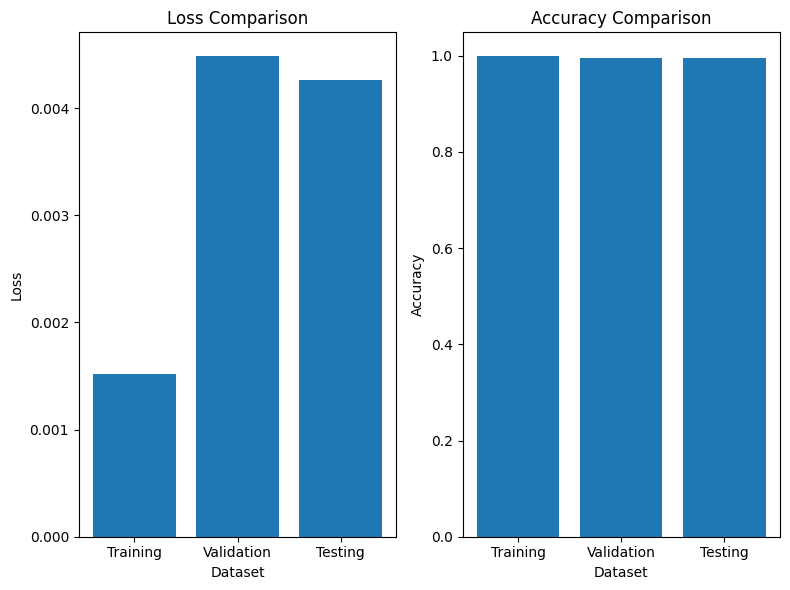

In [146]:
labels = ['Training', 'Validation', 'Testing']
loss = [train_loss, val_loss, test_loss]
acc = [train_acc, val_acc, test_acc]

plt.figure(figsize=(8, 6))
plt.subplot(121)
plt.bar(labels, loss)
plt.title('Loss Comparison')
plt.xlabel('Dataset')
plt.ylabel('Loss')

plt.subplot(122)
plt.bar(labels, acc)
plt.title('Accuracy Comparison')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

143/143 [==============================] - 1s 3ms/step


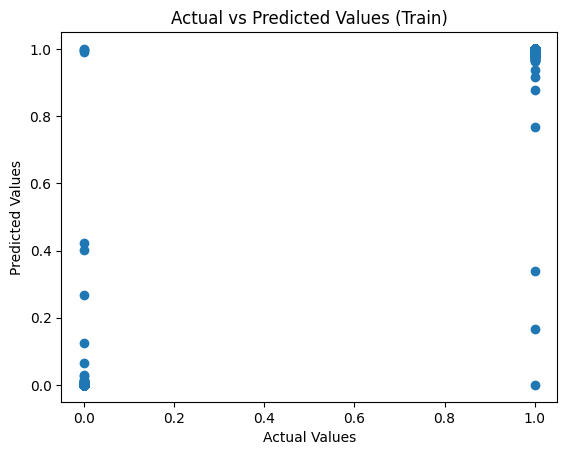

In [142]:
y_pred = best_model.predict(X_train)

plt.scatter(y_train, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Train)')

plt.show()

31/31 [==============================] - 0s 2ms/step


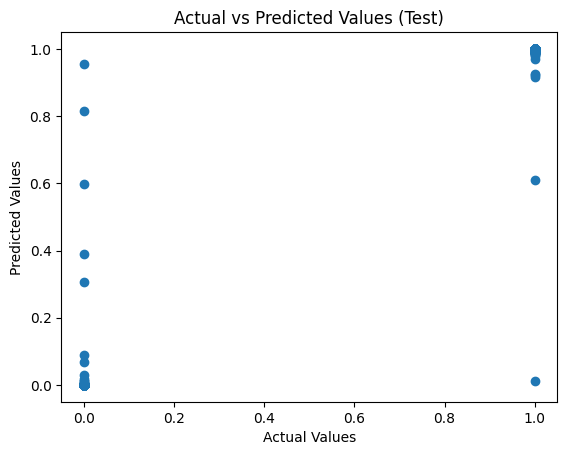

In [143]:
y_pred = best_model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test)')

plt.show()

31/31 [==============================] - 0s 2ms/step


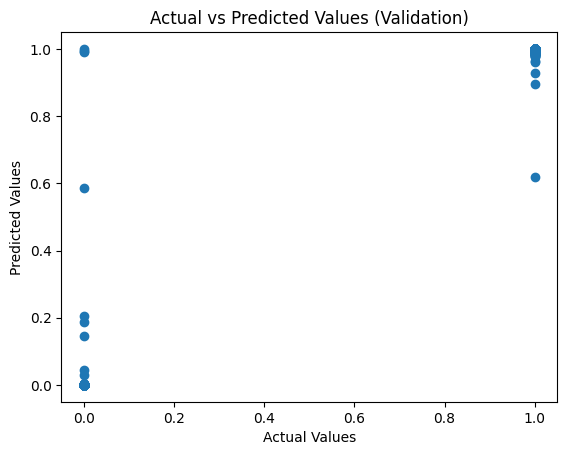

In [144]:
y_pred = best_model.predict(X_validation)

plt.scatter(y_validation, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Validation)')

plt.show()